In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,SimpleRNN,Flatten
import matplotlib.pyplot as plt



2023-06-07 02:24:47.285875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd
from nsepy import get_history
from datetime import date
data=pd.read_csv("/Users/shashwatbindal/Desktop/^NSEI2020.csv",parse_dates=True,index_col="Date")
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-17,12328.400391,12385.450195,12321.400391,12352.349609,12352.349609,502100.0
2020-01-20,12430.500000,12430.500000,12216.900391,12224.549805,12224.549805,491600.0
2020-01-21,12195.299805,12230.049805,12162.299805,12169.849609,12169.849609,400.0
2020-01-22,12218.349609,12225.049805,12087.900391,12106.900391,12106.900391,500.0
2020-01-23,12123.750000,12189.000000,12094.099609,12180.349609,12180.349609,867700.0
...,...,...,...,...,...,...
2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000.0
2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400.0
2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800.0


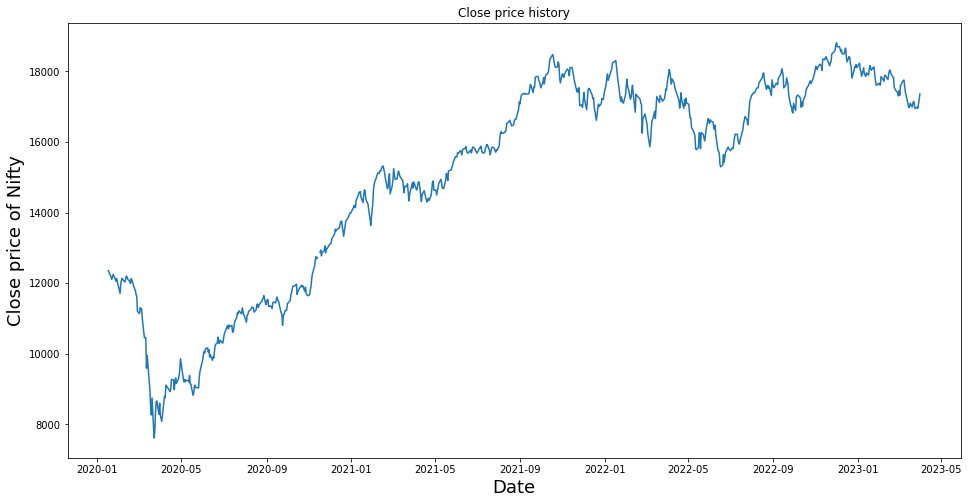

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(data["Close"])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price of Nifty',fontsize=18)
plt.show()

In [4]:
df1=data.reset_index()[:]
df1.dropna()
df1=df1[~df1.isnull()]
df1=df1[["Open","Close"]]
print(df1.shape)

df1


(797, 2)


,Open,Close
0,12328.400391,12352.349609
1,12430.500000,12224.549805
2,12195.299805,12169.849609
3,12218.349609,12106.900391
4,12123.750000,12180.349609
...,...,...
792,17076.199219,16945.050781
793,16984.300781,16985.699219
794,17031.750000,16951.699219
795,16977.300781,17080.699219


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,2))
df1

array([[0.41243901, 0.42331671],
       [0.42160678, 0.4119083 ],
       [0.40048759, 0.40702534],
       ...,
       [0.83476409, 0.83389044],
       [0.82987496, 0.84540599],
       [0.85080097, 0.87031623]])

In [6]:
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)

train_data=train_data.dropna()
train_data=train_data[~train_data.isnull()]
test_data=test_data.dropna()
test_data=test_data[~test_data.isnull()]
train_data=train_data.to_numpy()
test_data=test_data.to_numpy()
train_data.shape,test_data.shape

((636, 2), (160, 2))

In [7]:
def create_dataset(data,k):
    datax,datay=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,:]
        y=data[i+k,:]
        datax.append(x)
        datay.append(y)
    return np.array(datax),np.array(datay)

In [8]:
lookback=30
trainx,trainy=create_dataset(train_data,lookback)
testx,testy=create_dataset(test_data,lookback)
trainx.shape


(606, 30, 2)

In [9]:
trainx=np.reshape(trainx,(trainx.shape[0],trainx.shape[1],2))
testx=np.reshape(testx,(testx.shape[0],testx.shape[1],2))
trainx.shape[0],trainx.shape[1],trainx.shape[2],1,trainx.shape



(606, 30, 2, 1, (606, 30, 2))

In [10]:
regressor=Sequential()


2023-06-07 02:24:49.849113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# model.add(LSTM(550,return_sequences=True,input_shape=(lookback,4)))
# model.add(Dropout(0.2))
# model.add(LSTM(100,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(1,activation='softmax'))
# model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mae"])
# model.fit(trainx,trainy,epochs=10,batch_size=1)
# regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (lookback, 4)))
# regressor.add(Dense(1))
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# regressor.fit(trainx, trainy, batch_size = 32, epochs = 100)
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (trainx.shape[1], trainx.shape[2])))

regressor.add(Dropout(0.1)) 
regressor.add(LSTM(units=50))

regressor.add(Dense(2))

regressor.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
regressor.fit(trainx, trainy, epochs=80,validation_data=(testx, testy), verbose=1)


Epoch 1/80
19/19 [==============================] - 3s 40ms/step - loss: 0.1282 - mean_absolute_error: 0.2679 - val_loss: 0.0221 - val_mean_absolute_error: 0.1450
Epoch 2/80
19/19 [==============================] - 0s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0814 - val_loss: 0.0013 - val_mean_absolute_error: 0.0287
Epoch 3/80
19/19 [==============================] - 0s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0499 - val_loss: 0.0011 - val_mean_absolute_error: 0.0273
Epoch 4/80
19/19 [==============================] - 0s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0370 - val_loss: 9.0327e-04 - val_mean_absolute_error: 0.0246
Epoch 5/80
19/19 [==============================] - 0s 16ms/step - loss: 0.0021 - mean_absolute_error: 0.0322 - val_loss: 0.0010 - val_mean_absolute_error: 0.0263
Epoch 6/80
19/19 [==============================] - 0s 16ms/step - loss: 0.0020 - mean_absolute_error: 0.0326 - val_loss: 8.2007e-04 - val_mean_absolute_error: 0.0235
Epoch 7/80
19/

In [12]:
testpred=regressor.predict(testx)
print(testpred)



5/5 [==============================] - 0s 5ms/step
[[0.8945131  0.89566404]
 [0.8885214  0.88943887]
 [0.8776288  0.8780199 ]
 [0.8655274  0.86552644]
 [0.852034   0.85168236]
 [0.84035796 0.8399148 ]
 [0.83267266 0.8324098 ]
 [0.82867175 0.82876074]
 [0.8308905  0.8315874 ]
 [0.8380795  0.8394767 ]
 [0.8464736  0.8483572 ]
 [0.8527467  0.854796  ]
 [0.855666   0.8576503 ]
 [0.8558495  0.8576453 ]
 [0.853704   0.8552813 ]
 [0.8530622  0.85463977]
 [0.8531828  0.8547845 ]
 [0.8568645  0.85872155]
 [0.86283225 0.8649682 ]
 [0.8688648  0.87113863]
 [0.875247   0.87764466]
 [0.88253134 0.8850756 ]
 [0.8887845  0.8913492 ]
 [0.8938289  0.8963208 ]
 [0.89759517 0.89995986]
 [0.9026304  0.90502304]
 [0.9097259  0.9122831 ]
 [0.9165401  0.9191589 ]
 [0.92075986 0.9232177 ]
 [0.92389333 0.92621017]
 [0.92733574 0.92962044]
 [0.93029475 0.9325381 ]
 [0.93012744 0.93211025]
 [0.9322065  0.9342234 ]
 [0.93534994 0.93746614]
 [0.9392139  0.94142604]
 [0.94315827 0.9454352 ]
 [0.9457734  0.9480006 ]

In [13]:
combinedpred=np.concatenate((trainpred[3],testpred))
combinedtrue=np.concatenate((traintrue[3],testtrue))
plt.figure(figsize=(100,60))
plt.plot(combinedtrue,c="g")
plt.plot(combinedpred,c="b")
plt.show()

NameError: name 'trainpred' is not defined

In [14]:
testpred

array([[0.8945131 , 0.89566404],
       [0.8885214 , 0.88943887],
       [0.8776288 , 0.8780199 ],
       [0.8655274 , 0.86552644],
       [0.852034  , 0.85168236],
       [0.84035796, 0.8399148 ],
       [0.83267266, 0.8324098 ],
       [0.82867175, 0.82876074],
       [0.8308905 , 0.8315874 ],
       [0.8380795 , 0.8394767 ],
       [0.8464736 , 0.8483572 ],
       [0.8527467 , 0.854796  ],
       [0.855666  , 0.8576503 ],
       [0.8558495 , 0.8576453 ],
       [0.853704  , 0.8552813 ],
       [0.8530622 , 0.85463977],
       [0.8531828 , 0.8547845 ],
       [0.8568645 , 0.85872155],
       [0.86283225, 0.8649682 ],
       [0.8688648 , 0.87113863],
       [0.875247  , 0.87764466],
       [0.88253134, 0.8850756 ],
       [0.8887845 , 0.8913492 ],
       [0.8938289 , 0.8963208 ],
       [0.89759517, 0.89995986],
       [0.9026304 , 0.90502304],
       [0.9097259 , 0.9122831 ],
       [0.9165401 , 0.9191589 ],
       [0.92075986, 0.9232177 ],
       [0.92389333, 0.92621017],
       [0.

In [15]:
nifty_quote=pd.read_csv("/Users/shashwatbindal/Desktop/^NSEI2020.csv",parse_dates=True,index_col="Date")
nifty_quote=nifty_quote.reset_index()[:]
print(nifty_quote.shape)
nifty_quote.dropna()
nifty_quote=nifty_quote[~nifty_quote.isnull()]
nifty_quote=nifty_quote[["Open","High","Low","Close"]]

print(nifty_quote.shape)


(797, 7)
(797, 4)


In [50]:
last_10_days=nifty_quote[-44:-14].values

last_10_days=last_10_days[:,[0,3]]
last_10_days_scaled=scaler.transform(last_10_days.reshape(-1,2))
last_10_days_scaled.shape,last_10_days

((30, 2),
 array([[17877.199219, 17604.349609],
        [17541.949219, 17648.949219],
        [17731.449219, 17662.150391],
        [17811.599609, 17616.300781],
        [17517.099609, 17610.400391],
        [17721.75    , 17854.050781],
        [17818.550781, 17764.599609],
        [17790.099609, 17721.5     ],
        [17750.300781, 17871.699219],
        [17885.5     , 17893.449219],
        [17847.550781, 17856.5     ],
        [17859.099609, 17770.900391],
        [17840.349609, 17929.849609],
        [17896.599609, 18015.849609],
        [18094.75    , 18035.849609],
        [17974.849609, 17944.199219],
        [17965.550781, 17844.599609],
        [17905.800781, 17826.699219],
        [17755.349609, 17554.300781],
        [17574.650391, 17511.25    ],
        [17591.349609, 17465.800781],
        [17428.599609, 17392.699219],
        [17383.25    , 17303.949219],
        [17360.099609, 17450.900391],
        [17421.5     , 17321.900391],
        [17451.25    , 17594.349609],
  

In [51]:
xtest=[]
xtest.append(last_10_days_scaled)


In [52]:
xtest=np.array(xtest)
xtest.shape


(1, 30, 2)

In [53]:
future_pred=regressor.predict(xtest)
print(future_pred)
# future_pred=[[0,0,0,float(future_pred[0])]]
future_pred=scaler.inverse_transform(future_pred)
future_pred



1/1 [==============================] - 0s 30ms/step
[[0.88716286 0.889039  ]]


array([[17615.305, 17569.486]], dtype=float32)

In [47]:
last_10_days[:,[0,3]]

IndexError: index 3 is out of bounds for axis 1 with size 2